# 01. Neural Network Regression with Tensorflow

## Sub topics
* Architecture of a regression model
* Input shape and outupt shape
    * `X`: Features/data(inputs)
    * `Y`: labels (outputs)

* Creating custom data to view and fit
* Steps in modeling
    * Creating a model
    * Compiling a model
        * Defining a loss function
        * Setting up an optimizer
        * Creating eveluation metrics
    * Filtting a model (getting it to find pattenns in our data)

* Eveluating a model
    * Visualizing the model
    * Looking at training curves
    * Compare predictions to ground truth(using the eveluatin metrics)

* Saving a model 
* Loading a model

## Typical architecture of regresion neural network

| **Hyperparameter** | **Typical Value**|
|--|--|
| Input layer shape | Same shape as number of features |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 - 100 |
| Output layer shape | Same shape as desired prediction shape |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (mean square error) or [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error)/Huber (combination of MAE/MSE) if outliers |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) |

In [3]:
import tensorflow as tf
print(tf.__version__)

import datetime
print(f"This notebook was last run on: {datetime.datetime.now()}")

2.10.1
This notebook was last run on: 2024-10-02 19:45:24.705908


## Creating data to view and fit

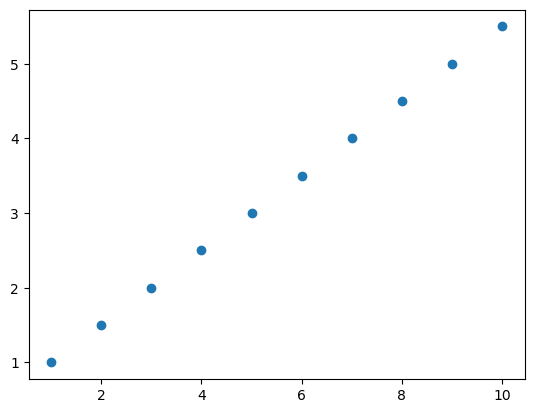

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=float)
# Create labels
y = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5], dtype=float)

# Visualize the data
plt.scatter(x, y);

## Regression input shapes and output shapes

* The `input shape` is the shape of the data that gose into the model.
* The `output shape` is the shape of data come out from the model.

In [7]:
# Example input and output shape of the regression model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([900000])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([900000])>)

In [8]:
house_info.shape

TensorShape([3])

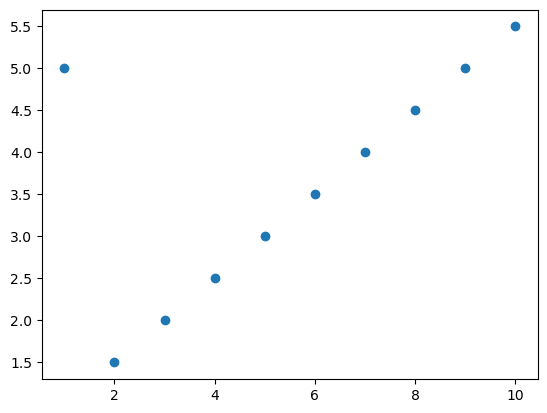

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
x = tf.constant([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=float)
# Create labels
y = tf.constant([5, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5], dtype=float)

# Visualize the data
plt.scatter(x, y);

In [16]:
# Take a single example of x
input_shape = x[0].shape

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # These are both scalars (no shape)

(TensorShape([]), TensorShape([]))

In [17]:
# Single examples invidually
x[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=1.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.0>)

## Steps in modelling with TensorFlow

In TensorFlow, there are typically 3 fundamental steps to creating and training a model
1. `Creating a model` - piece together the layers of neural network.
2. `Compilling a model` - defining how a models perfomaces should be measured.
3. `Fitting a model` - letting the model try to find patterns in the data.

In [22]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mea is short of mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # SGD is short of stochastic gradient descent
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(x, axis=1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 7.2839 - mae: 7.2839
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 6.9714 - mae: 6.9714
Epoch 3/5
1/1 [==============================] - 0s 5ms/step - loss: 6.6589 - mae: 6.6589
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 6.3464 - mae: 6.3464
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 6.0339 - mae: 6.0339


In [23]:
# Check out x, y
x, y

(<tf.Tensor: shape=(10,), dtype=float32, numpy=array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=array([5. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5], dtype=float32)>)

In [24]:
# Make a prediction with the model
model.predict([17.0])

1/1 [==============================] - 0s 93ms/step


array([[-6.5069656]], dtype=float32)